# Frequency & Exposure

- dataset A

In [295]:
import os
from IPython.display import display, HTML

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

look into folder

In [297]:
folders = f"{os.getcwd()}".split('/')[:-1]
folders.extend(['datasets', 'A', 'Archive', 'train.csv'])
path = os.path.join(*folders)
path = '/'+path
print(path)

/Users/school/Desktop/Github Repositories/CSE-5099/datasets/A/Archive/train.csv


In [298]:
train_df = pd.read_csv(
    filepath_or_buffer= path
)
print(train_df.shape)

display(HTML(train_df[:10].to_html()))

(1200000, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


### Null values?

In [299]:
for col in train_df.columns:
    if train_df[col].isnull().any() == True:
        print(f"{col}: has null values")

Age: has null values
Annual Income: has null values
Marital Status: has null values
Number of Dependents: has null values
Occupation: has null values
Health Score: has null values
Previous Claims: has null values
Vehicle Age: has null values
Credit Score: has null values
Insurance Duration: has null values
Customer Feedback: has null values


In [300]:
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
'''
for col in numerical_cols:    
    train_df[col] = train_df[col].fillna(
        value= train_df[col].mean()
    )
'''

'\nfor col in numerical_cols:    \n    train_df[col] = train_df[col].fillna(\n        value= train_df[col].mean()\n    )\n'

In [301]:

categorical_cols = ['Marital Status', 'Occupation', 'Customer Feedback']
'''
for col in categorical_cols:
    print(train_df[col].unique())

for col in categorical_cols:
    train_df[col].fillna(
        value= 'OTHER', 
        inplace=True
    )
'''

"\nfor col in categorical_cols:\n    print(train_df[col].unique())\n\nfor col in categorical_cols:\n    train_df[col].fillna(\n        value= 'OTHER', \n        inplace=True\n    )\n"

In [302]:
train_df = train_df.dropna(
            axis= 0,
        )

In [303]:
print(train_df.shape)
display(HTML(train_df[:10].to_html()))

(384004, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0
15,15,18.0,Male,6076.0,Married,2.0,High School,Employed,7.442964,Urban,Premium,1.0,12.0,584.0,5.0,2020-10-17 15:21:39.209847,Good,Yes,Monthly,Apartment,849.0
17,17,34.0,Female,45907.0,Divorced,4.0,High School,Self-Employed,24.059639,Suburban,Comprehensive,0.0,0.0,694.0,8.0,2020-12-27 15:21:39.090124,Poor,Yes,Daily,Condo,643.0
19,19,40.0,Female,123751.0,Single,2.0,Master's,Self-Employed,24.955316,Suburban,Premium,0.0,8.0,420.0,2.0,2020-06-25 15:21:39.152732,Good,Yes,Rarely,Condo,40.0
25,25,19.0,Male,72482.0,Married,2.0,Bachelor's,Unemployed,27.279416,Suburban,Premium,0.0,17.0,416.0,3.0,2021-03-10 15:21:39.097737,Good,Yes,Weekly,Condo,671.0
27,27,42.0,Male,35123.0,Married,2.0,Bachelor's,Self-Employed,31.391907,Suburban,Premium,0.0,3.0,486.0,4.0,2023-09-03 15:21:39.237118,Good,Yes,Rarely,Condo,2680.0
32,32,58.0,Male,1288.0,Divorced,4.0,Master's,Self-Employed,15.171629,Urban,Basic,1.0,2.0,803.0,2.0,2023-07-25 15:21:39.147735,Good,No,Rarely,Apartment,3299.0


### Convert Datetime?

In [304]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

if True:
    train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])
    train_df['Policy Start Date'] = train_df['Policy Start Date'].astype('int64')
    display(HTML(train_df[:10].to_html()))

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,1703344899134960000,Poor,No,Weekly,House,2869.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,1638372099252145000,Poor,Yes,Weekly,House,2022.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,1659972099181605000,Average,No,Rarely,Condo,111.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,1596381699144722000,Poor,No,Daily,Condo,64.0
15,15,18.0,Male,6076.0,Married,2.0,High School,Employed,7.442964,Urban,Premium,1.0,12.0,584.0,5.0,1602948099209847000,Good,Yes,Monthly,Apartment,849.0
17,17,34.0,Female,45907.0,Divorced,4.0,High School,Self-Employed,24.059639,Suburban,Comprehensive,0.0,0.0,694.0,8.0,1609082499090124000,Poor,Yes,Daily,Condo,643.0
19,19,40.0,Female,123751.0,Single,2.0,Master's,Self-Employed,24.955316,Suburban,Premium,0.0,8.0,420.0,2.0,1593098499152732000,Good,Yes,Rarely,Condo,40.0
25,25,19.0,Male,72482.0,Married,2.0,Bachelor's,Unemployed,27.279416,Suburban,Premium,0.0,17.0,416.0,3.0,1615389699097737000,Good,Yes,Weekly,Condo,671.0
27,27,42.0,Male,35123.0,Married,2.0,Bachelor's,Self-Employed,31.391907,Suburban,Premium,0.0,3.0,486.0,4.0,1693754499237118000,Good,Yes,Rarely,Condo,2680.0
32,32,58.0,Male,1288.0,Divorced,4.0,Master's,Self-Employed,15.171629,Urban,Basic,1.0,2.0,803.0,2.0,1690298499147735000,Good,No,Rarely,Apartment,3299.0


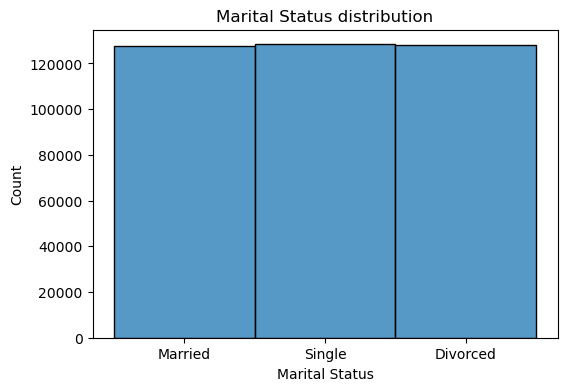

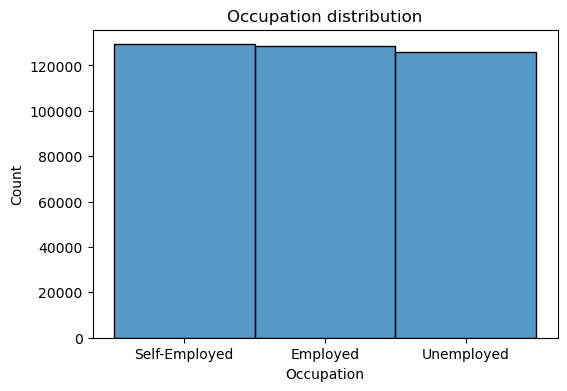

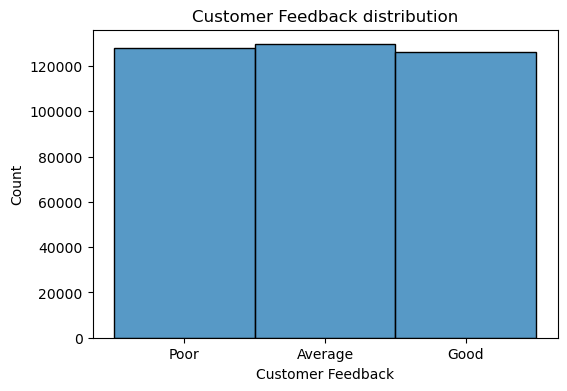

In [305]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data= train_df[col],
    )    
    plt.title(f'{col} distribution')
    plt.show()

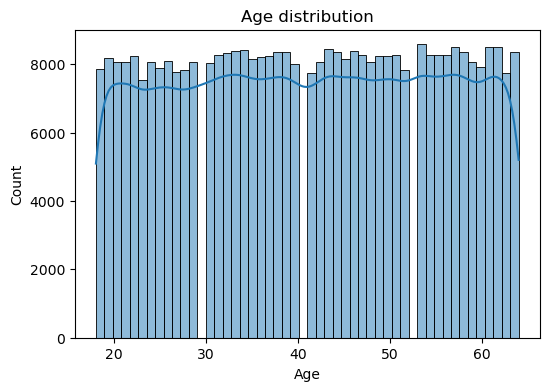

In [306]:
col, bins = 'Age', 50

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

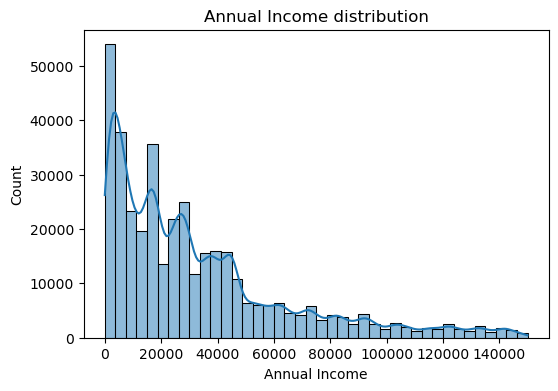

In [307]:
col, bins = 'Annual Income', 40

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

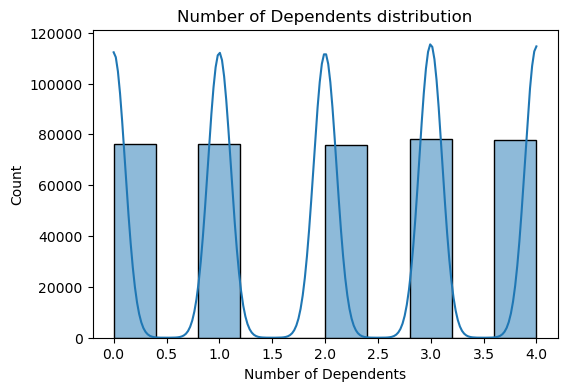

In [308]:
col, bins = 'Number of Dependents', 10

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

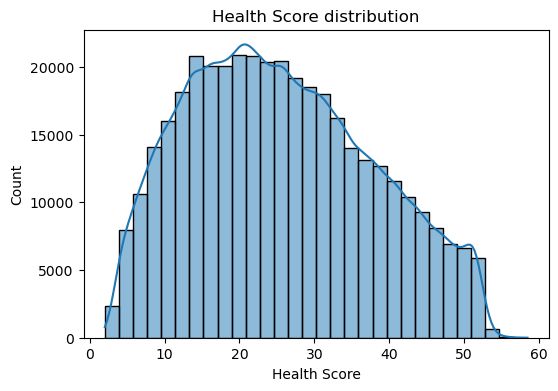

In [309]:
col, bins = 'Health Score', 30

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

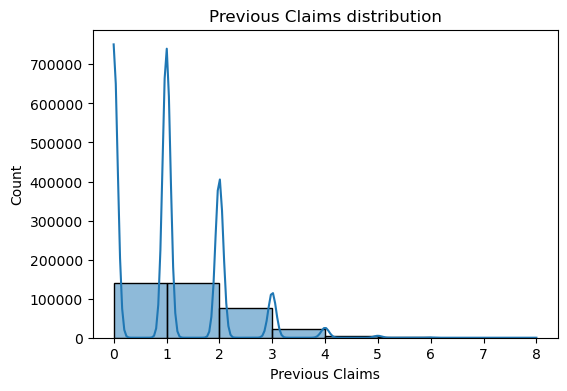

In [310]:
col, bins = 'Previous Claims', 8

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

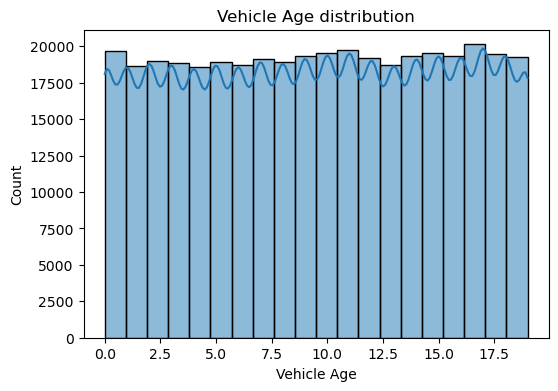

In [311]:
col, bins = 'Vehicle Age', 20

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

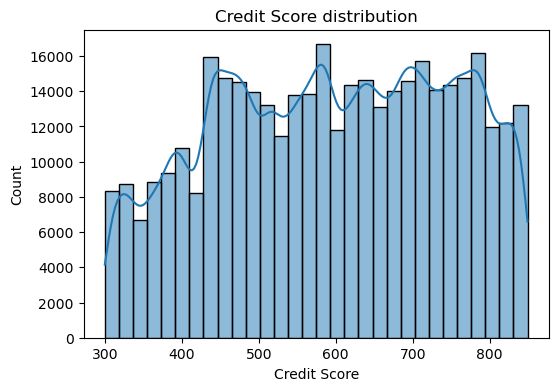

In [312]:
col, bins = 'Credit Score', 30

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

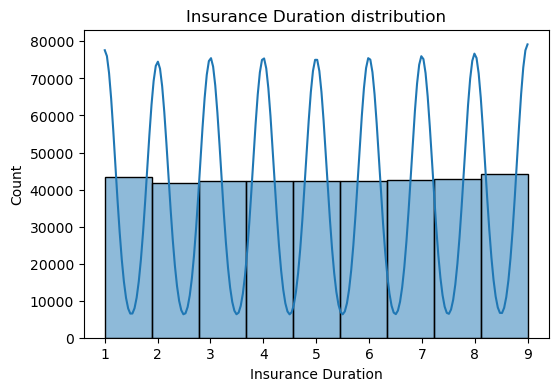

In [313]:
col, bins = 'Insurance Duration', 9

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

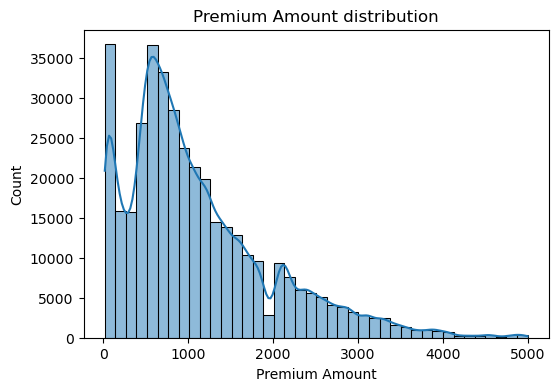

In [314]:
col, bins = 'Premium Amount', 40

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

In [315]:
print(train_df['Premium Amount'].min(), train_df['Premium Amount'].max())

20.0 4997.0


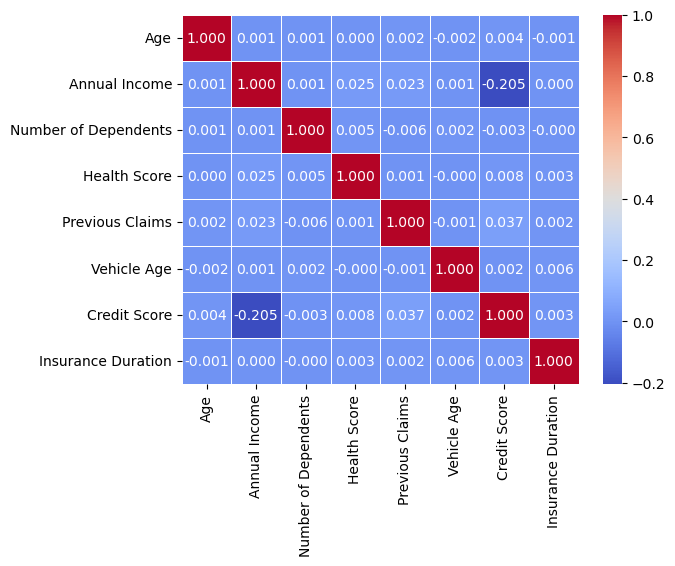

In [316]:
numerical_df = train_df[numerical_cols]
correlations = numerical_df.corr(
    method= 'pearson'
)

sns.heatmap(
    data = correlations,
    annot= True,
    cmap="coolwarm",
    fmt=".3f",
    linewidths=0.5
)
plt.show()

## Frequency and Severity

freq = (claims)/(duration)



severity = (total claim cost)/(# of claims)

In [317]:
train_df['Freq'] = train_df['Previous Claims'] / train_df['Insurance Duration']
# train_df['S'] = train_df['Premium Amount'] / 1

In [318]:
display(HTML(train_df[['Freq']][:10].to_html()))

,Freq
0,0.400000
4,0.000000
7,0.200000
9,0.333333
15,0.200000
17,0.000000
19,0.000000
25,0.000000
27,0.000000
32,0.500000


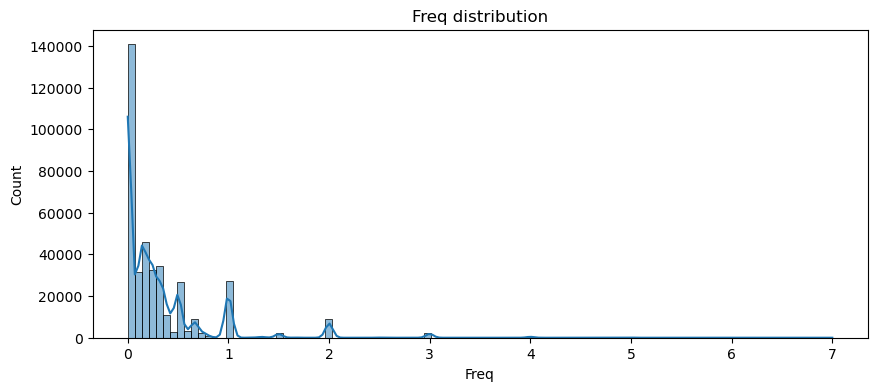

In [319]:
col, bins = 'Freq', 100

plt.figure(figsize=(10, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

In [320]:
'''
train_df['S'].hist(
    bins=100
)
'''

"\ntrain_df['S'].hist(\n    bins=100\n)\n"

### Back to data

- Feature Engineering

In [321]:
print(train_df.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Freq'],
      dtype='object')


In [322]:
train2_df = train_df[train_df.columns[1:]]

### Encoding Categorical Columns

In [323]:
# Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
OHE = OneHotEncoder(
    # *, 
    # categories='auto', 
    drop= 'if_binary', 
    # sparse_output= True, 
    # dtype=<class 'numpy.float64'>, 
    # handle_unknown='error', 
    # min_frequency=None, 
    # max_categories=None, 
    # feature_name_combiner='concat'
)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#ordinalencoder
OE = OrdinalEncoder(
    # *,
    categories='auto',
    # dtype=<class 'numpy.float64'>,
    # handle_unknown='error',
    # unknown_value=None,
    # encoded_missing_value=nan,
    # min_frequency=None,
    # max_categories=None
)

use_OHE = True

for col in train2_df.columns:
    if train2_df[col].dtype == 'object':
        
        if use_OHE:
            # https://www.geeksforgeeks.org/ml-one-hot-encoding/
            col_encoded = OHE.fit_transform(train2_df[[col]]).toarray()
            encoded_df = pd.DataFrame(
                col_encoded, 
                columns= OHE.get_feature_names_out([col]), 
                index= train2_df.index
            )
            train2_df = train2_df.drop(columns=col)
            train2_df = pd.concat([train2_df, encoded_df], axis=1)
        
        else:
            col_encoded = OE.fit_transform(train2_df[[col]])
            encoded_df = pd.DataFrame(
                col_encoded, 
                columns= OE.get_feature_names_out([col]), 
                index= train2_df.index
            )
            train2_df = train2_df.drop(columns=col)
            train2_df = pd.concat([train2_df, encoded_df], axis=1)

display(HTML(train_df[:8].to_html()))
display(HTML(train2_df[:8].to_html()))

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Freq
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,1703344899134960000,Poor,No,Weekly,House,2869.0,0.400000
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,1638372099252145000,Poor,Yes,Weekly,House,2022.0,0.000000
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,1659972099181605000,Average,No,Rarely,Condo,111.0,0.200000
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,1596381699144722000,Poor,No,Daily,Condo,64.0,0.333333
15,15,18.0,Male,6076.0,Married,2.0,High School,Employed,7.442964,Urban,Premium,1.0,12.0,584.0,5.0,1602948099209847000,Good,Yes,Monthly,Apartment,849.0,0.200000
17,17,34.0,Female,45907.0,Divorced,4.0,High School,Self-Employed,24.059639,Suburban,Comprehensive,0.0,0.0,694.0,8.0,1609082499090124000,Poor,Yes,Daily,Condo,643.0,0.000000
19,19,40.0,Female,123751.0,Single,2.0,Master's,Self-Employed,24.955316,Suburban,Premium,0.0,8.0,420.0,2.0,1593098499152732000,Good,Yes,Rarely,Condo,40.0,0.000000
25,25,19.0,Male,72482.0,Married,2.0,Bachelor's,Unemployed,27.279416,Suburban,Premium,0.0,17.0,416.0,3.0,1615389699097737000,Good,Yes,Weekly,Condo,671.0,0.000000


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,Freq,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Daily,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Apartment,Property Type_Condo,Property Type_House
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,1703344899134960000,2869.0,0.400000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,1638372099252145000,2022.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,48.0,127237.0,2.0,5.769783,1.0,11.0,398.0,5.0,1659972099181605000,111.0,0.200000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,44.0,52447.0,2.0,20.473718,1.0,9.0,635.0,3.0,1596381699144722000,64.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15,18.0,6076.0,2.0,7.442964,1.0,12.0,584.0,5.0,1602948099209847000,849.0,0.200000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,34.0,45907.0,4.0,24.059639,0.0,0.0,694.0,8.0,1609082499090124000,643.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19,40.0,123751.0,2.0,24.955316,0.0,8.0,420.0,2.0,1593098499152732000,40.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25,19.0,72482.0,2.0,27.279416,0.0,17.0,416.0,3.0,1615389699097737000,671.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Adding Non-Linear Terms
- Splines?
- Feature Engineering
- Polynomials
- Interactions

In [365]:
import random

random.seed(123)

test = train2_df[
    random.sample(
    population= list(train2_df.columns),
    k= 5
    )
]

display(HTML(test[:10].to_html()))

,Health Score,Education Level_Master's,Vehicle Age,Policy Type_Comprehensive,Credit Score
0,22.598761,0.0,17.0,0.0,372.0
4,20.376094,0.0,8.0,0.0,598.0
7,5.769783,0.0,11.0,1.0,398.0
9,20.473718,1.0,9.0,1.0,635.0
15,7.442964,0.0,12.0,0.0,584.0
17,24.059639,0.0,0.0,1.0,694.0
19,24.955316,1.0,8.0,0.0,420.0
25,27.279416,0.0,17.0,0.0,416.0
27,31.391907,0.0,3.0,0.0,486.0
32,15.171629,1.0,2.0,0.0,803.0


In [366]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 
from sklearn.preprocessing import PolynomialFeatures

if True:
    poly = PolynomialFeatures(
        degree= 3,
        # interaction_only=,
        include_bias= False,
        # order= ,
    )

    test_2 = poly.fit_transform(test)    
    test_2 = pd.DataFrame(
        data= test_2,
        columns= poly.get_feature_names_out()
    )
    
    
    print(test.shape)
    display(HTML(test[:10].to_html()))
    
    print(test_2.shape)
    display(HTML(test_2[:10].to_html()))

(384004, 5)


,Health Score,Education Level_Master's,Vehicle Age,Policy Type_Comprehensive,Credit Score
0,22.598761,0.0,17.0,0.0,372.0
4,20.376094,0.0,8.0,0.0,598.0
7,5.769783,0.0,11.0,1.0,398.0
9,20.473718,1.0,9.0,1.0,635.0
15,7.442964,0.0,12.0,0.0,584.0
17,24.059639,0.0,0.0,1.0,694.0
19,24.955316,1.0,8.0,0.0,420.0
25,27.279416,0.0,17.0,0.0,416.0
27,31.391907,0.0,3.0,0.0,486.0
32,15.171629,1.0,2.0,0.0,803.0


(384004, 55)


,Health Score,Education Level_Master's,Vehicle Age,Policy Type_Comprehensive,Credit Score,Health Score^2,Health Score Education Level_Master's,Health Score Vehicle Age,Health Score Policy Type_Comprehensive,Health Score Credit Score,Education Level_Master's^2,Education Level_Master's Vehicle Age,Education Level_Master's Policy Type_Comprehensive,Education Level_Master's Credit Score,Vehicle Age^2,Vehicle Age Policy Type_Comprehensive,Vehicle Age Credit Score,Policy Type_Comprehensive^2,Policy Type_Comprehensive Credit Score,Credit Score^2,Health Score^3,Health Score^2 Education Level_Master's,Health Score^2 Vehicle Age,Health Score^2 Policy Type_Comprehensive,Health Score^2 Credit Score,Health Score Education Level_Master's^2,Health Score Education Level_Master's Vehicle Age,Health Score Education Level_Master's Policy Type_Comprehensive,Health Score Education Level_Master's Credit Score,Health Score Vehicle Age^2,Health Score Vehicle Age Policy Type_Comprehensive,Health Score Vehicle Age Credit Score,Health Score Policy Type_Comprehensive^2,Health Score Policy Type_Comprehensive Credit Score,Health Score Credit Score^2,Education Level_Master's^3,Education Level_Master's^2 Vehicle Age,Education Level_Master's^2 Policy Type_Comprehensive,Education Level_Master's^2 Credit Score,Education Level_Master's Vehicle Age^2,Education Level_Master's Vehicle Age Policy Type_Comprehensive,Education Level_Master's Vehicle Age Credit Score,Education Level_Master's Policy Type_Comprehensive^2,Education Level_Master's Policy Type_Comprehensive Credit Score,Education Level_Master's Credit Score^2,Vehicle Age^3,Vehicle Age^2 Policy Type_Comprehensive,Vehicle Age^2 Credit Score,Vehicle Age Policy Type_Comprehensive^2,Vehicle Age Policy Type_Comprehensive Credit Score,Vehicle Age Credit Score^2,Policy Type_Comprehensive^3,Policy Type_Comprehensive^2 Credit Score,Policy Type_Comprehensive Credit Score^2,Credit Score^3
0,22.598761,0.0,17.0,0.0,372.0,510.703984,0.000000,384.178931,0.000000,8406.738970,0.0,0.0,0.0,0.0,289.0,0.0,6324.0,0.0,0.0,138384.0,11541.277106,0.000000,8681.967726,0.000000,189981.882012,0.000000,0.000000,0.000000,0.000000,6531.041834,0.000000,142914.562489,0.000000,0.000000,3.127307e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4913.0,0.0,107508.0,0.0,0.0,2352528.0,0.0,0.0,0.0,51478848.0
1,20.376094,0.0,8.0,0.0,598.0,415.185192,0.000000,163.008749,0.000000,12184.903989,0.0,0.0,0.0,0.0,64.0,0.0,4784.0,0.0,0.0,357604.0,8459.852335,0.000000,3321.481532,0.000000,248280.744533,0.000000,0.000000,0.000000,0.000000,1304.069992,0.000000,97479.231915,0.000000,0.000000,7.286573e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,38272.0,0.0,0.0,2860832.0,0.0,0.0,0.0,213847192.0
2,5.769783,0.0,11.0,1.0,398.0,33.290397,0.000000,63.467614,5.769783,2296.373671,0.0,0.0,0.0,0.0,121.0,11.0,4378.0,1.0,398.0,158404.0,192.078369,0.000000,366.194366,33.290397,13249.577980,0.000000,0.000000,0.000000,0.000000,698.143754,63.467614,25260.110379,5.769783,2296.373671,9.139567e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1331.0,121.0,48158.0,11.0,4378.0,1742444.0,1.0,398.0,158404.0,63044792.0
3,20.473718,1.0,9.0,1.0,635.0,419.173123,20.473718,184.263461,20.473718,13000.810839,1.0,9.0,1.0,635.0,81.0,9.0,5715.0,1.0,635.0,403225.0,8582.032251,419.173123,3772.558106,419.173123,266174.933033,20.473718,184.263461,20.473718,13000.810839,1658.371146,184.263461,117007.297553,20.473718,13000.810839,8.255515e+06,1.0,9.0,1.0,635.0,81.0,9.0,5715.0,1.0,635.0,403225.0,729.0,81.0,51435.0,9.0,5715.0,3629025.0,1.0,635.0,403225.0,256047875.0
4,7.442964,0.0,12.0,0.0,584.0,55.397713,0.000000,89.315568,0.000000,4346.690985,0.0,0.0,0.0,0.0,144.0,0.0,7008.0,0.0,0.0,341056.0,412.323187,0.000000,664.772560,0.000000,32352.264590,0.000000,0.000000,0.000000,0.000000,1071.786818,0.000000,52160.291822,0.000000,0.000000,2.538468e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1728.0,0.0,84096.0,0.0,0.0,4092672.0,0.0,0.0,0.0,199176704.0
5,24.059639,0.0,0.0,1.0,694.0,578.866217,0.000000,0.000000,2

In [377]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html#sklearn.preprocessing.SplineTransformer
from sklearn.preprocessing import SplineTransformer

if True:
    spline = SplineTransformer(
        n_knots= 3,
        degree= 3,
        # knots=,
        # extrapolation=,
        # include_bias=,
        # order=,
        # sparse_output=
    )
    test_2 = spline.fit_transform(test)    
    test_2 = pd.DataFrame(
        data= test_2,
        columns= list(spline.get_feature_names_out())
    )
    
    print(test.shape)
    display(HTML(test[:10].to_html()))
    
    print(test_2.shape)
    display(HTML(test_2[:10].to_html()))

(384004, 5)


,Health Score,Education Level_Master's,Vehicle Age,Policy Type_Comprehensive,Credit Score
0,22.598761,0.0,17.0,0.0,372.0
4,20.376094,0.0,8.0,0.0,598.0
7,5.769783,0.0,11.0,1.0,398.0
9,20.473718,1.0,9.0,1.0,635.0
15,7.442964,0.0,12.0,0.0,584.0
17,24.059639,0.0,0.0,1.0,694.0
19,24.955316,1.0,8.0,0.0,420.0
25,27.279416,0.0,17.0,0.0,416.0
27,31.391907,0.0,3.0,0.0,486.0
32,15.171629,1.0,2.0,0.0,803.0


(384004, 25)


,Health Score_sp_0,Health Score_sp_1,Health Score_sp_2,Health Score_sp_3,Health Score_sp_4,Education Level_Master's_sp_0,Education Level_Master's_sp_1,Education Level_Master's_sp_2,Education Level_Master's_sp_3,Education Level_Master's_sp_4,Vehicle Age_sp_0,Vehicle Age_sp_1,Vehicle Age_sp_2,Vehicle Age_sp_3,Vehicle Age_sp_4,Policy Type_Comprehensive_sp_0,Policy Type_Comprehensive_sp_1,Policy Type_Comprehensive_sp_2,Policy Type_Comprehensive_sp_3,Policy Type_Comprehensive_sp_4,Credit Score_sp_0,Credit Score_sp_1,Credit Score_sp_2,Credit Score_sp_3,Credit Score_sp_4
0,0.003309,0.328788,0.603274,0.064630,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.001555,0.289425,0.627011,0.082009,0.166667,0.666667,0.166667,0.000000,0.000000,0.066911,0.606891,0.323191,0.003008,0.000000
1,0.007119,0.381183,0.565834,0.045865,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000656,0.256111,0.643704,0.099529,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.127422,0.659651,0.212823,0.000105
2,0.108714,0.650214,0.240682,0.000390,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.099529,0.643704,0.256111,0.000656,0.000000,0.000000,0.166667,0.666667,0.166667,0.044305,0.561961,0.386150,0.007584,0.000000
3,0.006909,0.378877,0.567613,0.046601,0.000000,0.000000,0.000000,0.166667,0.666667,0.166667,0.000024,0.194295,0.663969,0.141712,0.000000,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.078970,0.623443,0.295802,0.001784
4,0.087902,0.633325,0.277593,0.001181,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.066676,0.606527,0.323760,0.003037,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.149954,0.665490,0.184549,0.000007
5,0.001751,0.294894,0.623958,0.079397,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.030007,0.518401,0.437842,0.013751
6,0.001094,0.274541,0.634886,0.089478,0.000000,0.000000,0.000000,0.166667,0.666667,0.166667,0.000656,0.256111,0.643704,0.099529,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.029717,0.517331,0.439028,0.013924,0.000000
7,0.000192,0.224029,0.656244,0.119535,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.001555,0.289425,0.627011,0.082009,0.166667,0.666667,0.166667,0.000000,0.000000,0.032086,0.525820,0.429517,0.012578,0.000000
8,0.000000,0.147050,0.665029,0.187909,0.000011,0.166667,0.666667,0.166667,0.000000,0.000000,0.053385,0.582689,0.358677,0.005249,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.005585,0.363085,0.579478,0.051851,0.000000
9,0.025382,0.500119,0.457635,0.016864,0.000000,0.000000,0.000000,0.166667,0.666667,0.166667,0.082009,0.627011,0.289425,0.001555,0.000000,0.166667,0.666667,0.166667,0.000000,0.000000,0.000000,0.000784,0.262143,0.640937,0.096135


## Metrics to look for in GLM

In [381]:
# ex

y_col = 'Previous Claims'
y = pd.DataFrame(
    data= {
        y_col: train2_df[y_col]
    }
)

X = train2_df.copy().drop(
    labels= [y_col],
    axis= 1,
)
X = sm.add_constant(
    data= X
)

print(y.shape)
display(HTML(y[:8].to_html()))

print(X.shape)
display(HTML(X[:8].to_html()))

(384004, 1)


,Previous Claims
0,2.0
4,0.0
7,1.0
9,1.0
15,1.0
17,0.0
19,0.0
25,0.0


(384004, 39)


,const,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,Freq,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Daily,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Apartment,Property Type_Condo,Property Type_House
0,1.0,19.0,10049.0,1.0,22.598761,17.0,372.0,5.0,1703344899134960000,2869.0,0.400000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,21.0,39651.0,1.0,20.376094,8.0,598.0,4.0,1638372099252145000,2022.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1.0,48.0,127237.0,2.0,5.769783,11.0,398.0,5.0,1659972099181605000,111.0,0.200000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,44.0,52447.0,2.0,20.473718,9.0,635.0,3.0,1596381699144722000,64.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15,1.0,18.0,6076.0,2.0,7.442964,12.0,584.0,5.0,1602948099209847000,849.0,0.200000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,1.0,34.0,45907.0,4.0,24.059639,0.0,694.0,8.0,1609082499090124000,643.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,40.0,123751.0,2.0,24.955316,8.0,420.0,2.0,1593098499152732000,40.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25,1.0,19.0,72482.0,2.0,27.279416,17.0,416.0,3.0,1615389699097737000,671.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [384]:
# https://www.statsmodels.org/stable/glm.html#model-class


glm_metrics = sm.GLM(
    endog= y, # Response variable
    exog= X, # (rows)x(predictors). Might need to add constant to add intercept!!!
    # family= sm.families.Poisson(), # Parent class for one-parameter exponential families
    # offset= ,
    # exposure= train2_df['Previous Claims'],
    # freq_weights= ,
    # var_weights= ,
    # missing= 'raise', # None, 'drop', 'raise' when doing nan checks on data
    # **kwargs: Any
).fit()

print(glm_metrics.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Previous Claims   No. Observations:               384004
Model:                            GLM   Df Residuals:                   384003
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                         0.95473
Method:                          IRLS   Log-Likelihood:            -5.3637e+05
Date:                Wed, 07 May 2025   Deviance:                   3.6737e+05
Time:                        18:32:03   Pearson chi2:                 3.67e+05
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0001265
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html


1. **DEVIANCE**
    - hi

## Modeling GLM with (Poisson, Gamma, Tweedie)

- claims => Possion
- severity => Gamma

- pure premiums => Tweedie

In [325]:
"""
Reminder!!!
- Scale:
- Log-Likelihood:
- Deviance: Measure of how good model is compared to over-fit one (lower is better)
- Pearson chi2: How well expected v.s. observed data's frequencies are statically significant.
- R^2: Proportion of variances (how much the output changes based on...) caused by the input variables.
- std err: How much the observed data deviates from model.
- z: How significant a predictor is. Tells you how many STD from the mean a value lies. 
- P>|z|: Probability of observing z compared to if were zero. (under 0.05 good)
- Link Function:
"""

"\nReminder!!!\n- Scale:\n- Log-Likelihood:\n- Deviance: Measure of how good model is compared to over-fit one (lower is better)\n- Pearson chi2: How well expected v.s. observed data's frequencies are statically significant.\n- R^2: Proportion of variances (how much the output changes based on...) caused by the input variables.\n- std err: How much the observed data deviates from model.\n- z: How significant a predictor is. Tells you how many STD from the mean a value lies. \n- P>|z|: Probability of observing z compared to if were zero. (under 0.05 good)\n- Link Function:\n"

### Poisson -> Claims

In [326]:
y_col = 'Previous Claims'
y = train2_df[y_col]


X = train2_df.copy().drop(
    labels= [y_col],
    axis= 1,
)
X = sm.add_constant(
    data= X
)

print(y[:8])
print(y.shape)
display(HTML(X[:8].to_html()))
print(X.shape)

0     2.0
4     0.0
7     1.0
9     1.0
15    1.0
17    0.0
19    0.0
25    0.0
Name: Previous Claims, dtype: float64
(384004,)


,const,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,Freq,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Daily,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Apartment,Property Type_Condo,Property Type_House
0,1.0,19.0,10049.0,1.0,22.598761,17.0,372.0,5.0,1703344899134960000,2869.0,0.400000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,21.0,39651.0,1.0,20.376094,8.0,598.0,4.0,1638372099252145000,2022.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1.0,48.0,127237.0,2.0,5.769783,11.0,398.0,5.0,1659972099181605000,111.0,0.200000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,44.0,52447.0,2.0,20.473718,9.0,635.0,3.0,1596381699144722000,64.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15,1.0,18.0,6076.0,2.0,7.442964,12.0,584.0,5.0,1602948099209847000,849.0,0.200000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,1.0,34.0,45907.0,4.0,24.059639,0.0,694.0,8.0,1609082499090124000,643.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,40.0,123751.0,2.0,24.955316,8.0,420.0,2.0,1593098499152732000,40.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25,1.0,19.0,72482.0,2.0,27.279416,17.0,416.0,3.0,1615389699097737000,671.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


(384004, 39)


In [327]:
# https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM
glm_p = sm.GLM(
    endog= y, # Response variable
    exog= X, # (rows)x(predictors). Might need to add constant to add intercept!!!
    family= sm.families.Poisson(), # Parent class for one-parameter exponential families
    # offset= ,
    # exposure= train2_df['Previous Claims'],
    # freq_weights= ,
    # var_weights= ,
    missing= 'raise', # None, 'drop', 'raise' when doing nan checks on data
    # **kwargs: Any
).fit()

print(glm_p.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Previous Claims   No. Observations:               384004
Model:                            GLM   Df Residuals:                   384003
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9702e+05
Date:                Wed, 07 May 2025   Deviance:                   4.3106e+05
Time:                        15:29:28   Pearson chi2:                 3.68e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          0.0005061
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             